In [2]:
from itertools import combinations, permutations
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Simple Test Problem

In [3]:
CITIES = [
    "Rome",
    "Milan",
    "Naples",
    "Turin",
    "Palermo",
    "Genoa",
    "Bologna",
    "Florence",
    "Bari",
    "Catania",
    "Venice",
    "Verona",
    "Messina",
    "Padua",
    "Trieste",
    "Taranto",
    "Brescia",
    "Prato",
    "Parma",
    "Modena",
]
test_problem = np.load('lab2/test_problem.npy')

In [4]:
test_problem

array([[   0.  ,  476.88,  188.43,  523.85,  427.5 ,  400.4 ,  303.01,
         230.91,  374.62,  536.38,  393.68,  411.33,  487.59,  392.75,
         429.09,  428.45,  444.27,  247.22,  366.89,  330.58],
       [ 476.88,    0.  ,  657.51,  125.52,  886.96,  119.26,  200.7 ,
         249.46,  786.94, 1011.07,  243.8 ,  140.56,  964.47,  209.75,
         357.67,  858.83,   80.1 ,  232.33,  115.75,  163.8 ],
       [ 188.43,  657.51,    0.  ,  711.49,  314.03,  587.74,  470.35,
         408.13,  220.54,  378.4 ,  534.25,  575.  ,  315.45,  542.28,
         534.96,  254.93,  616.29,  425.21,  544.03,  502.49],
       [ 523.85,  125.52,  711.49,    0.  ,  905.38,  123.92,  295.5 ,
         318.16,  864.93, 1042.55,  364.59,  261.88, 1005.05,  330.16,
         480.03,  932.46,  204.29,  301.66,  210.01,  259.53],
       [ 427.5 ,  886.96,  314.03,  905.38,    0.  ,  790.5 ,  729.04,
         653.02,  449.14,  165.64,  819.1 ,  837.52,  191.9 ,  819.94,
         838.42,  424.21,  865.79,  66

In [5]:
test_problem.shape

(20, 20)

In [6]:
def isMatrixSymmetric(matrix):
    return np.allclose(matrix, matrix.T)

isMatrixSymmetric(test_problem)

True

In [7]:
def doesMatrixHaveZeroDiagonal(matrix):
    return np.allclose(matrix.diagonal(), 0.0)

doesMatrixHaveZeroDiagonal(test_problem)

True

In [8]:
def doesMatrixHaveNegativeValues(matrix):
    return np.any(matrix < 0)

doesMatrixHaveNegativeValues(test_problem)

np.False_

In [9]:
def isTriangleInequalitySatisfied(matrix):
    return all(
        matrix[i, k] <= matrix[i, j] + matrix[j, k]
        for i, j, k in permutations(range(matrix.shape[0]), 3)
    )
    
isTriangleInequalitySatisfied(test_problem)

True

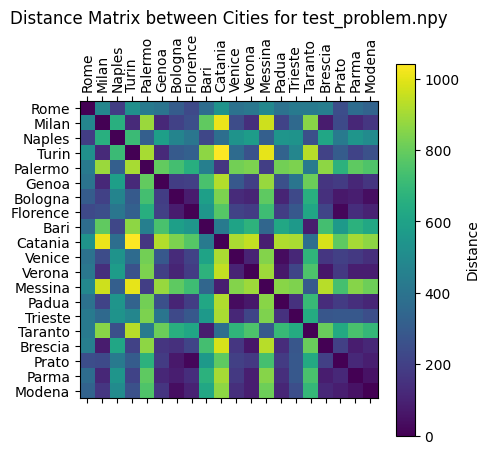

In [10]:
# Visualize the test problem with cities as legend
plt.matshow(test_problem, cmap='viridis')
plt.colorbar(label='Distance')
plt.xticks(ticks=np.arange(len(CITIES)), labels=CITIES, rotation=90)
plt.yticks(ticks=np.arange(len(CITIES)), labels=CITIES)
plt.title('Distance Matrix between Cities for test_problem.npy')
plt.show()

Solution represented as a matrix with Aij = 1 if the path goes from city i to city j.

In [11]:
# random solution
zero_solution = np.zeros_like(test_problem)
random_solution = zero_solution.copy()
cities = list(range(len(CITIES)))
np.random.shuffle(cities)
for i in range(len(cities)):
    j = (i + 1) % len(cities)
    random_solution[cities[i], cities[j]] = 1
print("Random solution:\n", random_solution)

Random solution:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

solution represented as a list of integers, where each one points to the next.

In [12]:
def matrix_to_array(solution_matrix):
    path = []
    current_city = 0
    visited = set()
    while len(visited) < len(solution_matrix):
        path.append(current_city)
        visited.add(current_city)
        next_city = np.argmax(solution_matrix[current_city])
        current_city = next_city
    return path

def array_to_matrix(path):
    size = len(path)
    solution_matrix = np.zeros((size, size), dtype=int)
    for i in range(size):
        j = (i + 1) % size
        solution_matrix[path[i], path[j]] = 1
    return solution_matrix

assert np.array_equal(random_solution, array_to_matrix(matrix_to_array(random_solution)))

In [13]:
G = nx.DiGraph(random_solution)
print(list(nx.simple_cycles(G)))
print(len(list(nx.simple_cycles(G))))
print(len(list(nx.simple_cycles(G))[0]))


[[0, 5, 9, 18, 4, 19, 2, 8, 15, 14, 10, 1, 11, 13, 16, 12, 7, 17, 3, 6]]
1
20


[0, np.int64(5), np.int64(9), np.int64(18), np.int64(4), np.int64(19), np.int64(2), np.int64(8), np.int64(15), np.int64(14), np.int64(10), np.int64(1), np.int64(11), np.int64(13), np.int64(16), np.int64(12), np.int64(7), np.int64(17), np.int64(3), np.int64(6)]


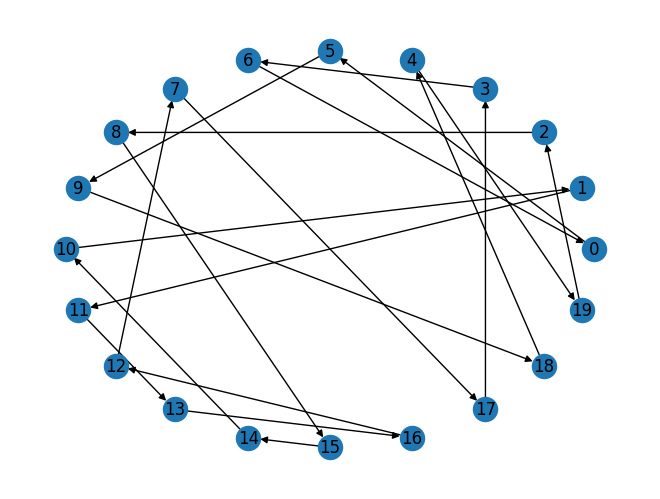

In [14]:
G = nx.from_numpy_array(random_solution, create_using=nx.DiGraph)
nx.draw_circular(G, with_labels=True)

print(matrix_to_array(random_solution))

In [15]:
def is_valid_solution(solution):
    n = solution.shape[0]
    for i in range(n):
        if np.sum(solution[i, :]) != 1:
            return False
        if np.sum(solution[:, i]) != 1:
            return False
    if solution.trace() != 0:
        return False
    graph = nx.DiGraph(solution)
    cycles = list(nx.simple_cycles(graph))
    if len(cycles) != 1 and len(cycles[0]) != n:
        return False
    return True

print("random solution valid:", is_valid_solution(random_solution))

random solution valid: True


In [16]:
def matrix_to_array_2(solution_matrix):
    graph = nx.DiGraph(solution_matrix)
    cycle = list(nx.simple_cycles(graph))[0]
    return cycle

print(matrix_to_array_2(random_solution))

assert np.array_equal(matrix_to_array_2(random_solution), matrix_to_array(random_solution))

[0, 5, 9, 18, 4, 19, 2, 8, 15, 14, 10, 1, 11, 13, 16, 12, 7, 17, 3, 6]


## Algorithm

procedure 2optSwap(route, v1, v2) {
    1. take route[start] to route[v1] and add them in order to new_route
    2. take route[v1+1] to route[v2] and add them in reverse order to new_route
    3. take route[v2+1] to route[start] and add them in order to new_route
    return new_route;
}

from wikipedia: https://en.wikipedia.org/wiki/2-opt

In [17]:
def swap2opt(solution, i, j):
    new_solution = solution.copy()
    new_solution[i+1:j] = solution[i+1:j][::-1]
    return new_solution

In [18]:
small_random_solution = np.array([[0, 1, 0, 0, 0],
                                  [0, 0, 1, 0, 0],
                                  [0, 0, 0, 1, 0],
                                  [0, 0, 0, 0, 1],
                                  [1, 0, 0, 0, 0],])
solution = matrix_to_array(small_random_solution)
print("Original solution:", solution)
new_solution = swap2opt(solution, 1, 4)
print("2-opt swapped solution:", new_solution)


Original solution: [0, np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2-opt swapped solution: [0, np.int64(1), np.int64(3), np.int64(2), np.int64(4)]


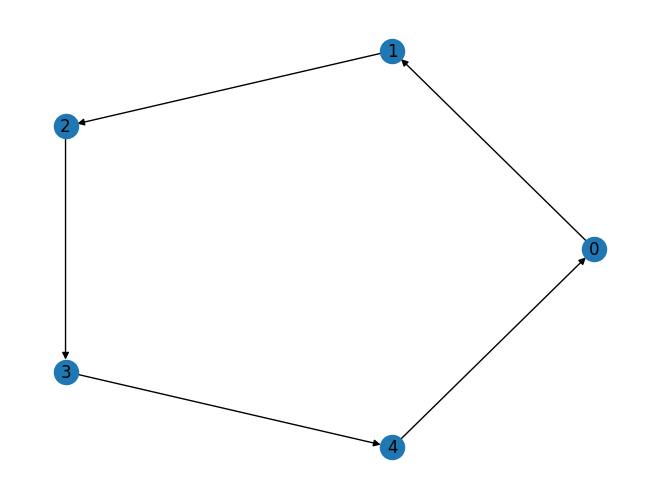

In [19]:
G = nx.from_numpy_array(array_to_matrix(solution), create_using=nx.DiGraph)
nx.draw_circular(G, with_labels=True)

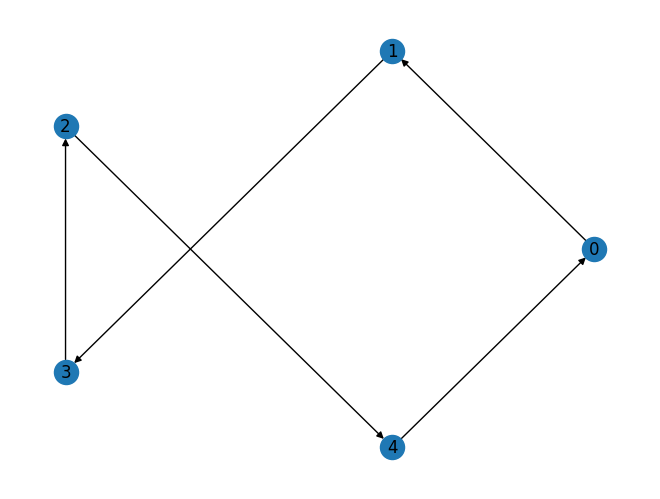

In [20]:
G1 = nx.from_numpy_array(array_to_matrix(new_solution), create_using=nx.DiGraph)
nx.draw_circular(G1, with_labels=True)

In [21]:
test_array = np.array([0, 1, 2, 3, 4, 5])
print(test_array)
print(swap2opt(test_array, 1, 4))

[0 1 2 3 4 5]
[0 1 3 2 4 5]


In [22]:
def totalDistance(solution, distance_matrix):
    total_distance = 0
    n = len(solution)
    for i in range(n):
        j = (i + 1) % n
        total_distance += distance_matrix[solution[i], solution[j]]
    return total_distance

Total distance of small_solution: 80


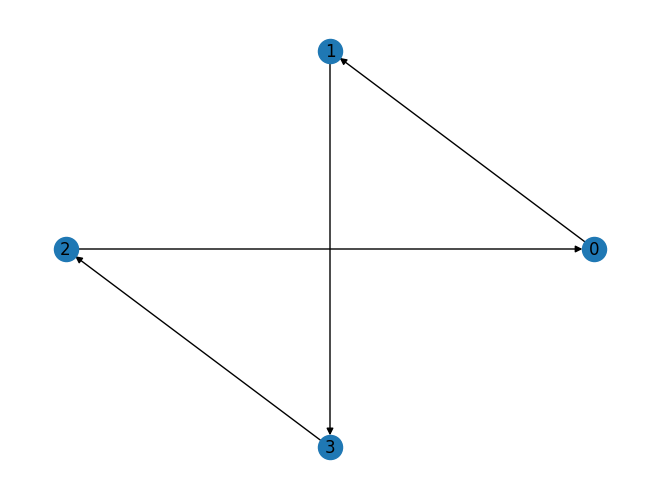

In [23]:
# Test totalDistance function

small_distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0],
])
small_solution = np.array([0, 1, 3, 2])
print("Total distance of small_solution:", totalDistance(small_solution, small_distance_matrix))

G = nx.from_numpy_array(array_to_matrix(small_solution), create_using=nx.DiGraph)
nx.draw_circular(G, with_labels=True)

Building the new route and calculating the distance of the new route can be a very expensive operation, usually O ( n ) {\displaystyle O(n)} where n is the number of vertices in the route. In a symmetric case (where the distance between A and B is the same as between B and A), this can be skipped by performing a O ( 1 ) {\displaystyle O(1)} operation. Since a 2-opt operation involves removing 2 edges and adding 2 different edges we can subtract and add the distances of only those edges.

lengthDelta = - dist(route[v1], route[v1+1]) - dist(route[v2], route[v2+1]) + dist(route[v1+1], route[v2+1]) + dist(route[v1], route[v2])

(wikipedia)

In [24]:
def tsp_simple(distance_matrix, init_solution, nb_iterations=1000):
    n = distance_matrix.shape[0]
    cities = list(range(n))
    
    best_route = init_solution
    best_distance = totalDistance(best_route, distance_matrix)
    evolution_distance = [best_distance]
    
    for _ in range(nb_iterations):
        current_route = np.random.permutation(cities)
        current_distance = totalDistance(current_route, distance_matrix)
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        evolution_distance.append(best_distance)
    return best_route, best_distance, evolution_distance

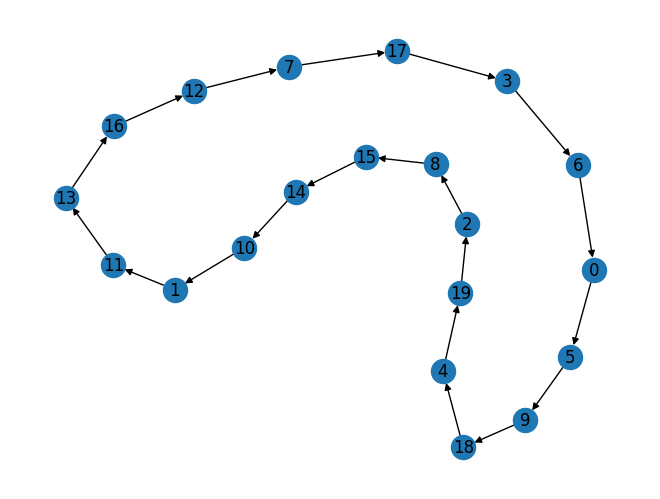

In [25]:
init_solution = matrix_to_array(random_solution)
ginit = nx.from_numpy_array(array_to_matrix(init_solution), create_using=nx.DiGraph)
nx.draw(ginit, with_labels=True)

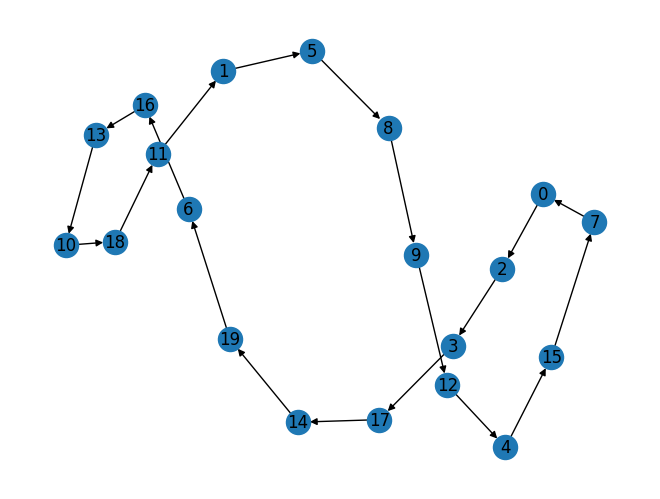

In [26]:

best_route, best_distance, evolution_distance = tsp_simple(test_problem, init_solution, nb_iterations=5000)
gend = nx.from_numpy_array(array_to_matrix(best_route), create_using=nx.DiGraph)
nx.draw(gend, with_labels=True)


Best route found: [12  4 15  7  0  2  3 17 14 19  6 16 13 10 18 11  1  5  8  9]
Best distance found: 5329.910000000001


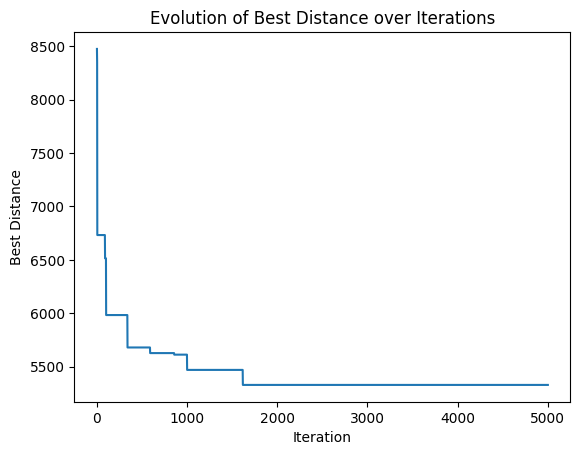

In [27]:
print("Best route found:", best_route)
print("Best distance found:", best_distance)
plt.plot(evolution_distance)
plt.title('Evolution of Best Distance over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.show()

https://math.stackexchange.com/questions/156161/finding-the-coordinates-of-points-from-distance-matrix

to better plot solution if cities distances work (and/or are realistic)

In [28]:
def distanceMatrixToCoordinates(D):
    n = D.shape[0]    # distance_matrix is n x n

    M = np.zeros_like(D)
    for i in range(n):
        for j in range(n):
            M[i, j] = 0.5 * (D[0, j]**2 + D[i, 0]**2 - D[i, j]**2)
    # Matrix decomposition
    eigenvalues, eigenvectors = np.linalg.eig(M)
    assert np.allclose(eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T, M)

    X = eigenvectors @ np.diag(np.sqrt(np.abs(eigenvalues)))
    
    # Indices where eigenvalues are too small
    small_eigenvalue_indices = np.where(eigenvalues < 1e-10)[0]
    X = np.delete(X, small_eigenvalue_indices, axis=1)
    
    # Check dimensionality
    print("Dimension of the coordinate space:", X.shape)
    
    return X

Text(0.5, 1.0, 'Random Coordinates')

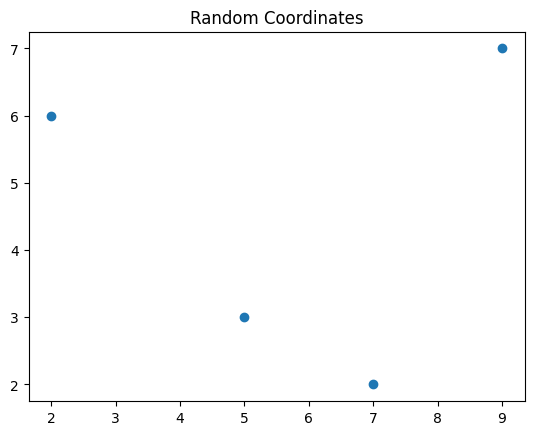

In [29]:
random_coords = np.random.randint(0, 10, size=(4, 2))
plt.scatter(random_coords[:, 0], random_coords[:, 1])
plt.title('Random Coordinates')

In [30]:
# distance matrix from coordinates
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(random_coords, random_coords)
dist_matrix

array([[0.        , 4.24264069, 5.65685425, 2.23606798],
       [4.24264069, 0.        , 7.07106781, 6.40312424],
       [5.65685425, 7.07106781, 0.        , 5.38516481],
       [2.23606798, 6.40312424, 5.38516481, 0.        ]])

In [31]:
estimated_coords = distanceMatrixToCoordinates(dist_matrix)
print(estimated_coords)

Dimension of the coordinate space: (4, 2)
[[ 0.          0.        ]
 [ 4.19767037 -0.6160872 ]
 [ 0.82144959  5.59689383]
 [-1.99615399  1.00765533]]


Text(0.5, 1.0, 'Estimated Coordinates from Distance Matrix')

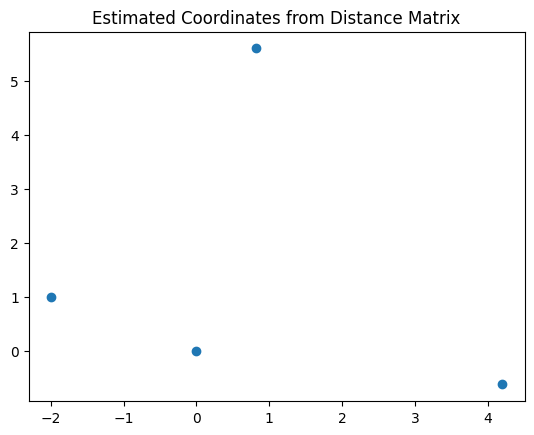

In [32]:
plt.scatter(estimated_coords[:, 0], estimated_coords[:, 1])
plt.title('Estimated Coordinates from Distance Matrix')

Coordinates are not the same but they translated somewhere else


Now we applied that to the cities

In [33]:
cities_coords = distanceMatrixToCoordinates(test_problem)

Dimension of the coordinate space: (20, 10)


That probabaly means that those distances cannot be represented on a 2D map but on a 10D map only. (Italy with 10 dimensions probably)

see link stackexhange: ("Note that, if the data points can be embedded in k-dimensional space, only k columns of X will be non-zero (corresponding to k non-zero eigenvalues of M).")

In [34]:
cities_coords.shape

(20, 10)

MDS = Multidimensional scaling

from https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS

"Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space."

In [35]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
cities_coords_transformed = mds.fit_transform(test_problem)
cities_coords_transformed.shape

/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


(20, 2)

Text(0.5, 1.0, 'Cities Coordinates from MDS Transformation')

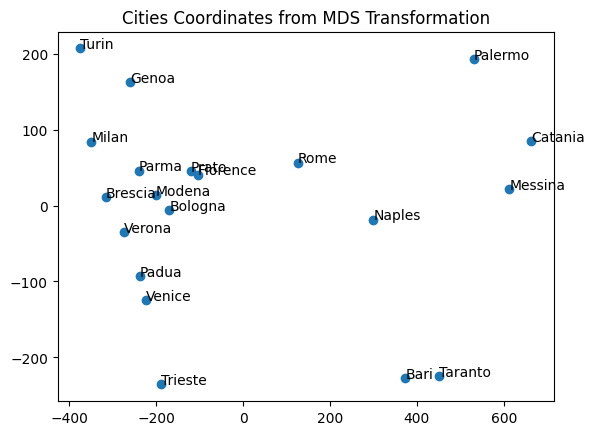

In [36]:
plt.scatter(cities_coords_transformed[:, 0], cities_coords_transformed[:, 1])
for i, city in enumerate(CITIES):
    plt.annotate(city, (cities_coords_transformed[i, 0], cities_coords_transformed[i, 1]))
plt.title('Cities Coordinates from MDS Transformation')

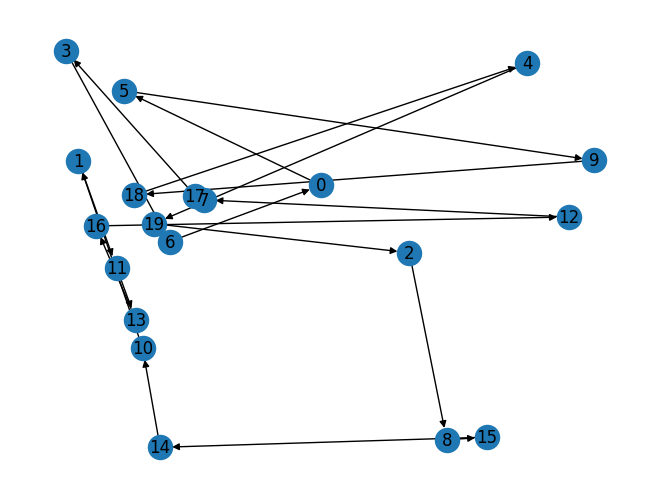

In [37]:
# Graph of random solution on the MDS coordinates
G = nx.from_numpy_array(random_solution, create_using=nx.DiGraph)
pos = {i: (cities_coords_transformed[i, 0], cities_coords_transformed[i, 1]) for i in range(len(CITIES))}
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

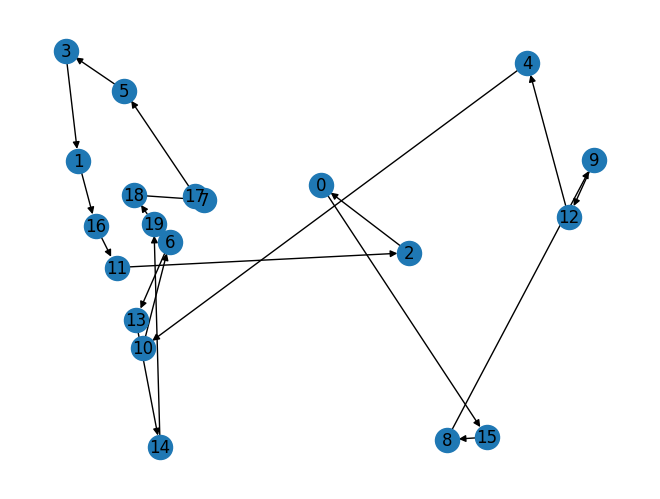

In [38]:
best_route, best_distance, evolution_distance = tsp_simple(test_problem, init_solution, nb_iterations=1000000)
gend = nx.from_numpy_array(array_to_matrix(best_route), create_using=nx.DiGraph)
nx.draw(gend, pos, with_labels=True, arrows=True)

Dimension of the coordinate space: (20, 10)


/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


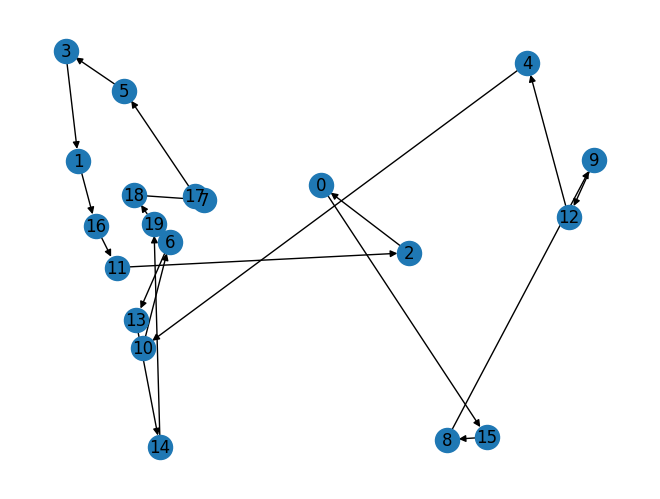

In [39]:
from sklearn.manifold import MDS

def plot_route(distance_matrix, route):
    coords = distanceMatrixToCoordinates(distance_matrix)
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    transformed_coords = mds.fit_transform(distance_matrix)
    graph = nx.from_numpy_array(array_to_matrix(route), create_using=nx.DiGraph)
    pos = {i: (transformed_coords[i, 0], transformed_coords[i, 1]) for i in range(len(route))}
    nx.draw(graph, pos, with_labels=True, arrows=True)

plot_route(test_problem, best_route)
    
        

## Common tests

In [40]:
problem = np.load('lab2/problem_r2_100.npy')

In [41]:
# Negative values?
np.any(problem < 0)

np.True_

In [42]:
# Diagonal is all zero?
np.allclose(np.diag(problem), 0.0)

False

In [43]:
# Symmetric matrix?
np.allclose(problem, problem.T)

False

In [44]:
# Triangular inequality
all(
    problem[x, y] <= problem[x, z] + problem[z, y]
    for x, y, z in list(combinations(range(problem.shape[0]), 3))
)

False